# Evaluation of Single-Context Features

In [1]:
dataset = 'youtube'
layer_name = 'LikesLayer' 

In [19]:
import pandas as pd
from pandas import DataFrame

df: DataFrame = pd.read_csv(f'data/{dataset}/ml_input/single_context/{layer_name}.csv', index_col=0)

In [27]:
COLUMNS = []
for i in range(3):
    COLUMNS += [h+f'.{i+1}' for h in 
    ['size', 'sd', 'scarcity', 'popularity', 'diversity', 'magnitude', 'temp_center_distance', 'time_f1', 'time_f2']
    ]

COLUMNS += ['evolution_label']

In [28]:
COLUMNS

['size.1',
 'sd.1',
 'scarcity.1',
 'popularity.1',
 'diversity.1',
 'magnitude.1',
 'temp_center_distance.1',
 'time_f1.1',
 'time_f2.1',
 'size.2',
 'sd.2',
 'scarcity.2',
 'popularity.2',
 'diversity.2',
 'magnitude.2',
 'temp_center_distance.2',
 'time_f1.2',
 'time_f2.2',
 'size.3',
 'sd.3',
 'scarcity.3',
 'popularity.3',
 'diversity.3',
 'magnitude.3',
 'temp_center_distance.3',
 'time_f1.3',
 'time_f2.3',
 'evolution_label']

In [29]:
df.columns = COLUMNS

# Evaluation of Cross-Context Features

In [7]:
dataset = 'youtube'
layer_name = 'LikesLayer' 
reference_layer_name = 'ViewsLayer'

In [ ]:
import pandas as pd
from pandas import DataFrame

df: DataFrame = pd.read_csv(f'data/{dataset}/ml_input/cross_context/{layer_name}_{reference_layer_name}.csv', index_col=0)

## Standardization

In [3]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)[:,:-1] # all except y

In [4]:
y = df[df.columns[-1]]

In [ ]:
pd.DataFrame(data=X, columns=df.columns[:-1]).head(2)

In [30]:
df.head(2)

,size.1,sd.1,scarcity.1,popularity.1,diversity.1,magnitude.1,temp_center_distance.1,time_f1.1,time_f2.1,size.2,...,size.3,sd.3,scarcity.3,popularity.3,diversity.3,magnitude.3,temp_center_distance.3,time_f1.3,time_f2.3,evolution_label
0,1.0,0.0,0.0,0.000091,0.000183,0.0,2.2,0.568065,0.822984,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.748511,0.663123,-1.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.992709,0.120537,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992709,-0.120537,-1.0


In [ ]:
y.value_counts()

## Principal Components

In [31]:
from sklearn.decomposition import PCA

n_components = 10

pca = PCA(n_components=n_components)
# compute scores in Xp
Xp = pca.fit_transform(X)
# get loadings and the ammount of variance explained by each component 
c, v, r = pca.components_, pca.explained_variance_, pca.explained_variance_ratio_

loadings = pd.DataFrame(data=c, columns=df.columns[:-1], index=range(n_components))

In [11]:
pd.DataFrame(data=Xp, 
             columns=[f'Z{i+1}' for i in range(n_components)])

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10
0,-0.168816,-0.053058,0.267579,-0.035999,-0.012545,1.433794,-0.396463,1.763088,0.630923,0.034910
1,-0.884871,0.169540,-1.796813,0.008273,0.001021,0.891177,0.856891,0.058710,-0.022858,0.047587
2,0.443359,0.039854,-0.772903,-0.036451,0.016829,-0.911476,-1.344437,1.218976,-1.105190,-0.080137
3,-0.854960,-0.288239,2.838445,-0.010156,0.000727,0.118628,0.865400,0.048275,-0.023601,0.060426
4,-0.877890,0.075037,-0.786473,0.006765,0.001849,-0.171029,0.879920,0.040947,-0.027198,0.047959
...,...,...,...,...,...,...,...,...,...,...
565819,1.536324,0.104252,-1.823928,-0.047624,0.005387,0.811525,-1.117300,2.050897,-0.803641,-0.018232
565820,-0.233108,0.199060,-2.184184,0.009082,0.028105,-0.240721,-0.197911,-0.329895,-1.678571,-0.045953
565821,-0.888695,0.206657,-2.149995,0.007444,0.001224,0.092125,0.873035,0.044949,-0.022172,0.039347
565822,1.529951,0.159364,-2.184140,-0.059007,0.003080,-0.637061,-1.091591,2.007867,-0.825255,-0.014639


In [14]:
loadings

,cluster_size,cluster_variance,cluster_density,cluster_import1,cluster_import2,cluster_area,cluster_center_distance,time_f1,time_f2,cluster_size.1,...,time_f2.1,cluster_size.2,cluster_variance.2,cluster_density.2,cluster_import1.2,cluster_import2.2,cluster_area.2,cluster_center_distance.2,time_f1.2,time_f2.2
0,0.393729,0.008284,0.008295,0.396586,0.140288,0.008069,0.008208,-0.003003,0.004051,0.396144,...,0.003211,0.393288,0.009952,0.009255,0.397085,0.139039,0.010120,0.006878,-0.001835,0.002384
1,-0.012943,0.269209,0.272162,-0.013192,-0.002244,0.261956,0.241974,0.046347,-0.032224,-0.011871,...,-0.038823,-0.014100,0.300861,0.291054,-0.014104,-0.003045,0.306262,0.177921,0.038157,-0.040685
2,-0.003656,0.025603,0.026055,-0.005204,-0.001868,0.024888,0.021295,-0.476989,0.321081,-0.002835,...,0.376160,-0.001311,0.031830,0.030994,-0.005113,-0.001672,0.032398,0.015841,-0.396385,0.395065
3,-0.008696,-0.357302,-0.347308,-0.008497,-0.012491,-0.361534,-0.198682,0.001117,0.002011,0.000260,...,-0.000395,0.007367,0.414641,0.405461,0.007164,0.012266,0.406383,0.189810,0.003406,-0.002507
4,-0.003403,-0.352127,-0.336442,-0.003323,-0.004660,-0.346543,0.058228,-0.000218,0.000063,0.005732,...,-0.000689,-0.003315,-0.188518,-0.199887,-0.003263,-0.004689,-0.176459,-0.049595,-0.000383,0.000281
5,-0.006448,0.002726,0.003599,-0.006460,-0.018750,0.003222,-0.008216,0.169939,0.556605,0.005118,...,0.461671,0.013071,-0.000003,0.000033,0.001797,-0.002219,0.000409,-0.000656,0.519958,0.234274
6,0.088154,0.005967,0.005200,0.076113,-0.583605,0.006828,-0.031287,-0.002976,-0.009865,0.101199,...,-0.009772,0.124639,0.012644,0.010388,0.114040,-0.521355,0.013684,-0.036546,-0.009585,-0.006481
7,0.280105,-0.014650,-0.014252,0.290463,0.626634,-0.015299,0.038516,0.003859,0.010037,-0.048899,...,0.006721,-0.216889,0.021961,0.021925,-0.223190,-0.556295,0.022048,-0.066332,0.007656,0.005529
8,0.092980,-0.003668,-0.004779,0.099314,0.248465,-0.003321,0.009773,0.000549,-0.002406,-0.281243,...,-0.000102,0.181192,-0.003833,-0.003070,0.192423,0.471036,-0.004125,0.034766,0.000628,0.001171
9,0.016365,-0.058114,-0.053689,0.015570,-0.020194,-0.068020,0.392702,-0.000926,0.008170,0.005485,...,0.005383,-0.000523,-0.174892,-0.149220,-0.001844,-0.057980,-0.189221,0.612586,0.002612,0.001602


In [12]:
loadings.apply(lambda col: col != 0).sum().sort_values()

cluster_size                 10
cluster_center_distance.2    10
cluster_area.2               10
cluster_import2.2            10
cluster_import1.2            10
cluster_density.2            10
cluster_variance.2           10
cluster_size.2               10
time_f2.1                    10
time_f1.1                    10
cluster_center_distance.1    10
cluster_area.1               10
time_f1.2                    10
cluster_import2.1            10
cluster_density.1            10
cluster_variance.1           10
cluster_size.1               10
time_f2                      10
time_f1                      10
cluster_center_distance      10
cluster_area                 10
cluster_import2              10
cluster_import1              10
cluster_density              10
cluster_variance             10
cluster_import1.1            10
time_f2.2                    10
dtype: int64

Effect of Variables on each Component:

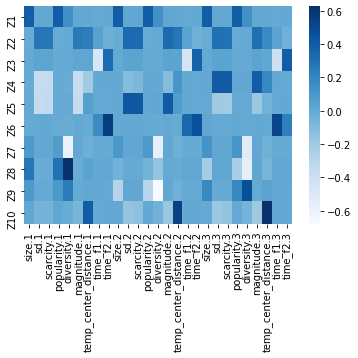

In [32]:
import seaborn as sns
sns.heatmap(c, cmap='Blues',
            yticklabels=["Z"+str(x) for x in range(1,len(c)+1)],
            xticklabels=list(df.columns[:-1]))

Variance explained by Components:

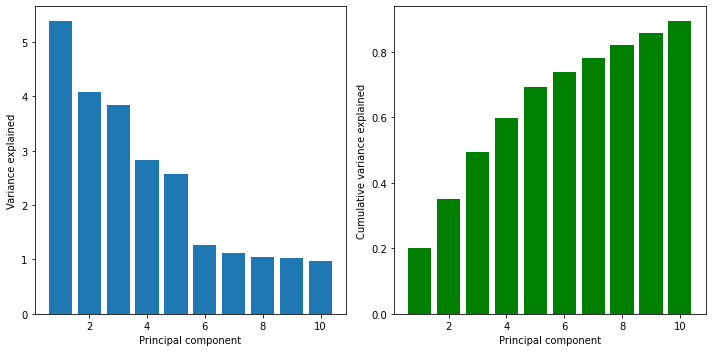

In [34]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True)
ax[0].bar(range(1,len(v)+1),v)
ax[0].set_ylabel('Variance explained')
ax[1].set_ylabel('Cumulative variance explained')
ax[0].set_xlabel('Principal component')
ax[1].set_xlabel('Principal component')
ax[1].bar(range(1,len(r)+1), np.cumsum(r), color='green')
fig.tight_layout()

Loadings to Components:


In [ ]:
def biplot(z1, z2, sc, comps, obs, features, colors, title):
    x, y = sc[:,z1], sc[:,z2]
    
    fig = plt.figure(figsize=(10,10))
    plt.xlabel("Z{}".format(z1))
    plt.ylabel("Z{}".format(z2))

    sx = (x.max() - x.min())/2
    sy = (y.max() - y.min())/2

    # print X and y label
    y_colors = ['red', 'orange', 'green', 'magenta', 'blue']
    plt.scatter(x, y, c=[y_colors[int(e)] for e in obs])
    # for i in range(len(obs)):
    #     plt.text(x[i], y[i], obs[i], ha='center', fontsize=12)

    vec = np.transpose(comps[[z1,z2], :])
    
    for i in range(len(vec)):
        plt.arrow(0, 0, vec[i,0]*sx, vec[i,1]*sy, ec=colors[i],
                  head_width=0.1, head_length=0.1, fc=colors[i])
        plt.text(vec[i,0]*sx*1.2, vec[i,1]*sy*1.2, features[i], 
                 color = colors[i])

    plt.title(title)
    plt.grid()

In [ ]:
import itertools

feature_colors = plt.cm.rainbow(np.linspace(0, 1, len(df.columns)))
for z1, z2 in itertools.combinations(range(n_components), 2):
    biplot(z1, z2, Xp, c, y, df.columns, colors=feature_colors, title=f"z1={z1} z2={z2}")

In [ ]:
sns.pairplot(df, hue="evolution_label")